

#  In-Depth Analysis of The Movie Database (TMDb)


Olatomi Adigun (30235750)

Arie DeKraker (30214014)

Victoria Nukiry (30230180)

Daniel Stratis (30222950)

**Overview of The Movie Database (TMDb) Dataset**
The Movie Database (TMDb) is an extensive database that offers a wealth of information about movies, such as titles, ratings, release dates, revenue, genres, and more. This dataset comprises a collection of 930,000 movies sourced from the TMDb database.

this data set is an open data set update daily from Kaggle
https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies/data

Each entry in the dataset is meticulously structured, providing a multi-faceted glimpse into the cinematic world. The columns include:

- **ID**: A unique identifier for each movie.
- **Title**: The official title of the movie.
- **Vote Average**: The average rating out of 10, reflecting the movie's reception among TMDb users.
- **Vote Count**: The total number of votes a movie has received.
- **Status**: The release status of the film.
- **Release Date**: The date when the movie was made available to the public.
- **Revenue**: The total worldwide box office revenue generated by the movie.
- **Runtime**: The length of the movie in minutes.
- **Adult**: A boolean indicating whether the movie is for an adult audience.
- **Backdrop Path**: A path to an image file providing a backdrop visual for the movie.
- **Budget**: The cost incurred in the production of the movie.
- **Homepage**: A URL to the movie's official homepage.
- **IMDb ID**: The Internet Movie Database identifier that links to the movie's IMDb page.
- **Original Language**: The language in which the movie was originally produced.
- **Original Title**: The title of the movie in its original language.
- **Overview**: A brief synopsis of the movie's plot.
- **Popularity**: A metric that combines several factors to determine how much interest TMDb users have in a movie.
- **Poster Path**: A path to the movie's poster image.
- **Tagline**: A memorable phrase or sentence that summarizes the tone and premise of the movie.
- **Genres**: A list of genres that the movie falls into.
- **Production Companies**: The companies responsible for producing the movie.
- **Production Countries**: The countries where the movie was produced.
- **Spoken Languages**: The languages spoken in the movie.




**Data Cleaning and Processing:**

To prepare the TMDB dataset for analysis, a rigorous process of data cleaning and processing is undertaken, ensuring the dataset's quality and usability. Here's a general overview of such processes:


 `Define Global Variables:` It defines variables for input and output file names and specifies columns to drop.


`Data Filtering:`

   1 Drops unnecessary columns from the dataframe as defined in `cols_to_drop`. These columns include:

    'status', 'release_date', 'backdrop_path', 'homepage', 'imdb_id', 'original_title', 'overview', 'poster_path', 'tagline', 'production_companies', 'production_countries', and 'spoken_languages'.

   2 Inspects the variable data types using `str(df)` to understand the structure of the dataframe.

   3 Replaces empty cells with `NA` .
   4 Removes rows with `NA` values to ensure the dataset does not have incomplete data.
   4 Filters out rows where `revenue` is below 1000 or `runtime` is zero to exclude movies with negligible revenue or incorrect runtime entries.

 `Save Cleaned Data:` The cleaned dataframe is then saved as a new CSV file named "TMDB_cleaned_movie_dataset.csv" without row names.

 The result is a streamlined and more analytically useful dataset, prepared for further analysis or modeling.



**Importing the important libraries and get an over view of the data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from collections import Counter
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

In [ ]:
df= pd.read_csv("TMDB_cleaned_movie_dataset.csv")
# Check the data types of each column
summary = pd.DataFrame({
    'Count': df.count(),
    'Total Length': len(df),
    'Type': df.dtypes
})

print(summary)

                   Count  Total Length     Type
id                 15830         15830    int64
title              15830         15830   object
vote_average       15830         15830  float64
vote_count         15830         15830    int64
revenue            15830         15830  float64
runtime            15830         15830    int64
adult              15830         15830     bool
budget             15830         15830    int64
original_language  15830         15830   object
overview           15830         15830   object
popularity         15830         15830  float64
genres             15830         15830   object


In [ ]:
df.head()

,id,title,vote_average,vote_count,revenue,runtime,adult,budget,original_language,overview,popularity,genres
0,27205,Inception,8.364,34495,8.255328e+08,148,False,160000000,en,"Cobb, a skilled thief who commits corporate es...",83.952,"Action, Science Fiction, Adventure"
1,157336,Interstellar,8.417,32571,7.017292e+08,169,False,165000000,en,The adventures of a group of explorers who mak...,140.241,"Adventure, Drama, Science Fiction"
2,155,The Dark Knight,8.512,30619,1.004558e+09,152,False,185000000,en,Batman raises the stakes in his war on crime. ...,130.643,"Drama, Action, Crime, Thriller"
3,19995,Avatar,7.573,29815,2.923706e+09,162,False,237000000,en,"In the 22nd century, a paraplegic Marine is di...",79.932,"Action, Adventure, Fantasy, Science Fiction"
4,24428,The Avengers,7.710,29166,1.518816e+09,143,False,220000000,en,When an unexpected enemy emerges and threatens...,98.082,"Science Fiction, Action, Adventure"


#Predicting Movie Genres from Overviews Using Text Processing Techniques

In this section, we will attempt to predict the genres of movies based on their overview.
Initially, we preprocessed the overviews using CountVectorizer to transform the text data into a numerical format suitable for machine learning.
then partitioned our dataset into a training set of 10,000 entries and a testing set with the remaining data.

**First try:** Initially, we will use the genres column as it is, which contains multiple genres for the same movie.

In [ ]:
df['overview'] = df['overview'].str.lower()
vectorizer = CountVectorizer(min_df=2, max_df=5000, stop_words="english")
vectorizer.fit(df.overview)
vectorizer.fit(df.genres)
X = vectorizer.transform(df.overview)
y = df['genres']
print(X.shape)
print(y.shape)

(15830, 19)
(15830,)


In [ ]:
X_tr = X[:10000]
X_te = X[10000:]
y_tr = y[:10000]
y_te =y[10000:]
model = MultinomialNB()
model.fit(X_tr, y_tr)
yhat = model.predict(X_te)
accuracy_score(y_te, yhat)

0.1307032590051458

In [ ]:
model = SGDClassifier(loss="log_loss", tol=1e-4)
model.fit(X_tr, y_tr)
yhat = model.predict(X_te)
accuracy_score(y_te, yhat)

0.13259005145797598

We observed that the model has low accuracy. Therefore, we decided to focus on studying the one genre mentioned for each movie to improve its performance.

**Second Try**

To address this, our second approach involved parsing the genre field by commas to extract individual genre labels we used the first genre for each movie and applied  SGDClassifier and MultinomialNB .

In [ ]:
split_columns = df['genres'].str.split(',', expand=True)

# Assign the split results to new columns in the original DataFrame
df['First_genres'] = split_columns[0]
df['Second_Genres'] = split_columns[0].astype(str) + '' + split_columns[1].astype(str)
df['Third_genres'] = split_columns[2]
df['fourth_genres'] = split_columns[3]
df['fifth_genres'] = split_columns[4]

X = vectorizer.transform(df.overview)
y = df['First_genres']

X_tr = X[:10000]
X_te = X[10000:]
y_tr = y[:10000]
y_te =y[10000:]
model = MultinomialNB()
model.fit(X_tr, y_tr)
yhat = model.predict(X_te)
accuracy_score(y_te, yhat)

0.30257289879931387

In [ ]:
model = SGDClassifier(loss="log_loss", tol=1e-4)
model.fit(X_tr, y_tr)
yhat = model.predict(X_te)
accuracy_score(y_te, yhat)

0.30497427101200686


We found some improvement in the model's accuracy by focusing on the first genre mentioned for each movie, but the results are still not quite impressive.
 Clearly, this approach may not be effective as the number of genres and there order can vary depending on the movie. Therefore, we need to consider multiple genres together to better represent each movie's genre classification.

**That's When we nail it**
The breakthrough came with our third strategy, where we transformed the genre field into dummy variables, facilitating the representation of each genre as a separate binary feature. This allowed us to implement a MultiOutputClassifier with LogisticRegression, optimizing our ability to handle multiple labels simultaneously.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MultiLabelBinarizer

# Load the dataset
df = pd.read_csv('TMDB_cleaned_movie_dataset.csv')

# Preprocess the data
df['overview'] = df['overview'].str.lower()  # Convert to lowercase
# Add more preprocessing steps as needed

# Feature extraction
vectorizer = CountVectorizer(min_df=2, max_df=5000, stop_words="english")
vectorizer.fit(df.overview)
X = vectorizer.transform(df.overview)

genres_dummies = df['genres'].str.get_dummies(sep=',')
genres_dummies=genres_dummies.drop_duplicates()
df = pd.concat([df.drop(columns=['genres']), genres_dummies], axis=1)
df = df.drop_duplicates()

y=df[['Comedy','Crime','Action','Adventure','Animation','Documentary','Drama','Family','Fantasy',
      'History',	'Horror',	'Music','Mystery','Romance','Science Fiction','TV Movie',	'Thriller','War',	'Western']].fillna(0)

X_tr = X[:10000]
X_te = X[10000:]
y_tr = y[:10000]
y_te =y[10000:]

# Model building
model = MultiOutputClassifier(LogisticRegression())
model.fit(X_tr, y_tr)

# Evaluation
y_pred = model.predict(X_te)

print('Accuracy:', accuracy_score(y_te, y_pred))




Accuracy: 0.9283018867924528


**Cool**
Let's check if that's for real so to assess how well is or model we will use the Cross-validation

**5 Fold Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5)

# Print the accuracy for each fold
print("Accuracy for each fold: ", scores)

# Print the mean accuracy across all folds
print("Mean accuracy: ", scores.mean())


Accuracy for each fold:  [0.75173721 0.87902716 0.90871762 0.93051169 0.92672142]
Mean accuracy:  0.8793430195830702


**PERFECT!**

so we were able to redict the genres of the movies from the overview using the mulioutputclassifier method with mean accurcy of 0.88

#  Distribution of Movie Revenues (in $USD)

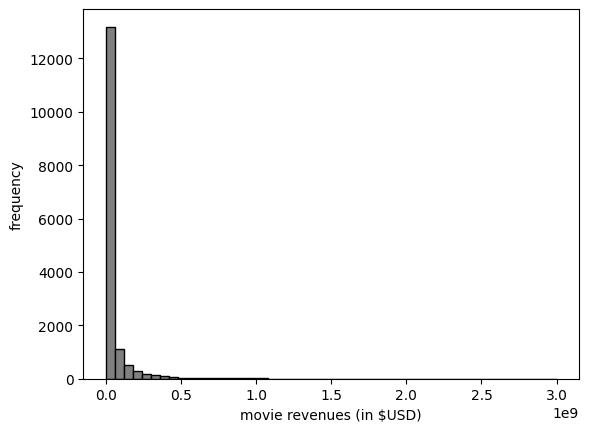

In [ ]:
revenue = np.array(df['revenue'])

#plot the histogram
plt.hist(revenue, bins = 50, color = 'gray', edgecolor = 'black')
plt.ylabel('frequency')
plt.xlabel('movie revenues (in $USD)')
plt.show()

Given the shape of the histogram and that movie revenue's can be described by the number of dollars generated within a fixed interval of time, the poisson distribution seems like a strong candidate to model this probability distribution.

However, one characteristic of the poisson distribution is that the mean and variance are equal. Let's see if this holds...

## Mean-variance relationship

In [ ]:
#mean-variance relationship
mean = revenue.mean()
var = revenue.var()
print(f"Let movie revenue be random variable with a mean of {mean:.0f} and variance of {var:.0f}")

Let movie revenue be random variable with a mean of 45700734 and variance of 17297195138892010


The mean and variance are not equal and given the high variance, overdispersion may be present.

### Bootstrapping movie revenues

In [ ]:
np.random.seed(44) #set the seed
n = 30 #bootstrap sample size
n_iter = 1000 #number of iterations
boot = {}

#apply bootrapping to the data
for i in range(n_iter):
    sample = np.random.choice(revenue, size = n, replace = True)
    boot[i] = [sample.mean(), sample.var()]

boot_df = pd.DataFrame(boot).T
boot_df.columns = ['boot_mean','boot_var']

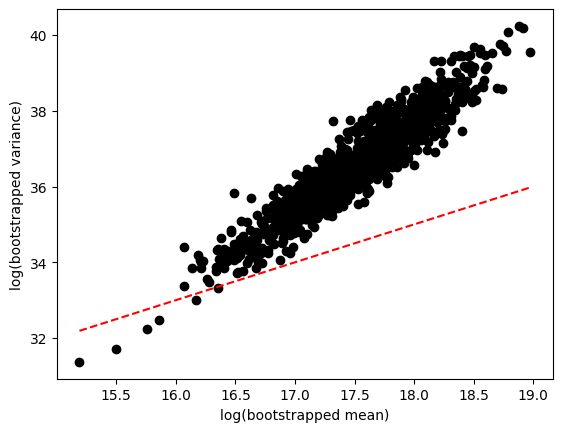

In [ ]:
#define the diagonal lines
x_line = np.linspace(min(np.log(boot_df['boot_mean'])), max(np.log(boot_df['boot_mean'])), 10)
y_line = 17 + x_line

#plot the bootstrapped mean and variances
plt.scatter(np.log(boot_df['boot_mean']), np.log(boot_df['boot_var']), c = 'black')
plt.plot(x_line, y_line, color = 'red', linestyle = '--')
plt.ylabel('log(bootstrapped variance)')
plt.xlabel('log(bootstrapped mean)')
plt.show()

The scatterplot demonstrates unqual variances across mean estimates (ie. heteroscedasicity). There exists a mean-variance relationship such that the variance increases with an increasing mean. This means the data is overdispersed making the negative binomial distribution a strong candidate to repsesent the probability distribution for movie revenue's.

## Simulating the negative binomial distribution
### Parameter estimation: method of moments

The negative binomial distribution is described as the number of failures before observing the rth success, where p is the fixed probability for success. This can parameterized as follows:

$$E[Y]=\dfrac{pr}{1-p}$$
$$Var(Y)=\dfrac{pr}{(1-p)^2}$$

The mean $\mu$ is related to the probability of success as:
$$\hat{p}=\dfrac{\hat{\mu}}{\hat{\sigma}^2}$$

The number of successes r may also be specified in terms of a "dispersion" parameter $\alpha$, which related the mean $\mu$ to the variance $\sigma^2$:
$$\alpha=\dfrac{\hat{\sigma}^2-\hat{\mu}}{\hat{\mu}^2}$$
$$\hat{r}=\dfrac{1}{\alpha}$$

In [ ]:
#estimate the parameters for a NB distribution given movie revenue counts
mu = revenue.mean()
sigma = revenue.std()
phat = mu / sigma**2
rhat = mu**2 / (sigma**2 - mu)
print(f"The paramters for this negative binomial distribution are p = {phat:.4f} and r = {rhat:.4f}")

The paramters for this negative binomial distribution are p = 0.0000 and r = 0.1207


In [ ]:
#generate samples from a negative binomial distribution given the parameters
np.random.seed(44) #set the seed
sample_nb = np.random.negative_binomial(rhat, phat, size = len(revenue))

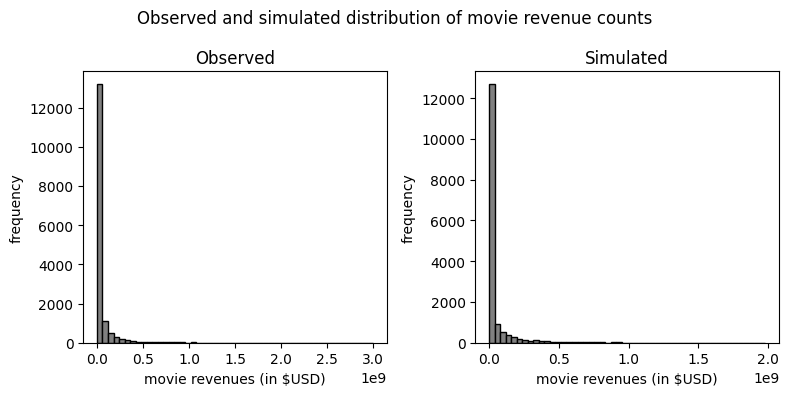

In [ ]:
#plot the histograms
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (8,4))
fig.suptitle("Observed and simulated distribution of movie revenue counts")

#observed count histogram
ax1.hist(revenue, bins = 50, color = 'gray', edgecolor = 'black')
ax1.set_ylabel('frequency')
ax1.set_xlabel('movie revenues (in $USD)')
ax1.set_title('Observed')

#simulated count histogram
ax2.hist(sample_nb, bins = 50, color = 'gray', edgecolor = 'black')
ax2.set_ylabel('frequency')
ax2.set_xlabel('movie revenues (in $USD)')
ax2.set_title('Simulated')

plt.tight_layout()
plt.show()

## Testing the negative binomial distribution

Let Y be a random variable representing movie revenue counts.

Assuming a negative binomial distribution: Y ~ NB(r, p)

$$H_{0}:\text{ Observed and expected data frequencies come from the same distribution}$$

$$H_{A}:\text{ Observed and expected data frequencies do not come from the same distribution}$$

### Chi-squared goodness of fit test

$$\chi^{2}=\sum_{i=1}^{n}\dfrac{(O_{i}-E_{i})^2}{E_{i}}$$

In [ ]:
#define observed and expected frequencies
observed = revenue
expected = sample_nb + 0.001 #add to prevent dividing by zero

#calculate the chi-squared statistic
chi_stat = np.sum((observed - expected)**2 / expected)
chi_stat

#calculate the p-value
p_val = 1 - stats.chi2(df = len(revenue) - 2).cdf(chi_stat)
print(f"Chi-squared p-value: {p_val}")

Chi-squared p-value: 0.0


### Likelihood ratio test (LRT)

$$\chi_{q}^{2}=-2\log\dfrac{L_{0}}{L_{1}}=-2(l_{0}-l_{1})$$

In [ ]:
#calculate the likelihood ratio test statistic
likelihood_null = np.sum(stats.nbinom.logpmf(revenue, rhat, phat))
likelihood_alt = np.sum(stats.nbinom.logpmf(sample_nb, rhat, phat))
LRT_stat = -2 * (likelihood_null - likelihood_alt)

#calculate the p-value
p_val = 1 - stats.chi2(df = 1).cdf(LRT_stat)
print(f"LRT p-value: {p_val}")

LRT p-value: 0.0


The p-value for both the chi-squared and likelihood ratio tests are both less than 0.05 so we reject the null hypothesis in favour of the alternative that the observed and simulated data do not come from the same distributions.

This would indicate that the movie revenue's data is not NB distributed. However, given the large sample size of ~15000 data points and therefore substantial statistical power of this hypothesis test, any small deviation from an NB distribution will result in a significant p-value. Additionally, the simulated data generated using a NB distribution mimics the observed data closely.

## Conclusion

Movie revenues can be modelled using a negative binomial probability distribution. The distribution parameter estimates *r* and *p* were estimated using the method of moments. Perhaps Maximum Likelihood Estimation (MLE) would yield more accurate estimates for *r* and *p* resulting in a more accurate probability distribution.*italicized text*

#  sampling methods to estimate movie revenues

## Simple Random Sample (SRS)

$$\bar{y_{s}}=\sum_{i=1}^{n}\dfrac{y_{i}}{n}$$

$$\hat{Var}(\bar{y_{s}})=\dfrac{v}{n}(1-\dfrac{n}{N})$$

In [ ]:
rng = np.random.default_rng(44) #set the seed
num_var = 'revenue' #define the numeric variable to estimate
n_iter = 1000 #number of sampling iterations
n = 1000 #sample size
N = len(df) #population size

In [ ]:
srs_means = np.zeros(n_iter)
srs_mean_sds = np.zeros(n_iter)

for i in range(n_iter):
    sample = df.sample(n, random_state = rng) #take a simple random sample
    srs_means[i] = sample[num_var].mean() #estimate the sample mean
    srs_var = sample[num_var].var() #estimate the sample variance
    srs_mean_sds[i] = np.sqrt(((srs_var / n) * (1 - (n / N)))) #estimate SD of the sample mean

### Confidence interval estimate

In [ ]:
lower_CI = np.percentile(srs_means, 5)
upper_CI = np.percentile(srs_means, 95)

print(f"The estimated 95% confidence interval for mean movie revenue using a simple random sample is between {lower_CI:.0f} and {upper_CI:.0f} USD.")

The estimated 95% confidence interval for mean movie revenue using a simple random sample is between 39118995 and 52555094 USD.


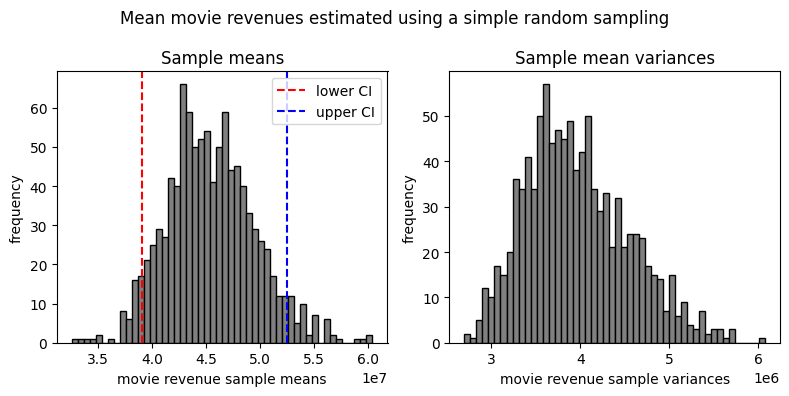

In [ ]:
#plot the sampling means and their variance
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (8,4))
fig.suptitle("Mean movie revenues estimated using a simple random sampling")

#sample means
ax1.hist(srs_means, bins = 50, color = 'gray', edgecolor = 'black')
ax1.set_ylabel('frequency')
ax1.set_xlabel('movie revenue sample means')
ax1.set_title('Sample means')
ax1.axvline(x = lower_CI, color = 'red', linestyle = '--', label = 'lower CI')
ax1.axvline(x = upper_CI, color = 'blue', linestyle = '--', label = 'upper CI')
ax1.legend()

#sample mean variances
ax2.hist(srs_mean_sds, bins = 50, color = 'gray', edgecolor = 'black')
ax2.set_ylabel('frequency')
ax2.set_xlabel('movie revenue sample variances')
ax2.set_title('Sample mean variances')

plt.tight_layout()
plt.show()

In [ ]:
pop_mean = revenue.mean()
print(f"The population mean of movie revenues is {pop_mean:.0f} USD.")

The population mean of movie revenues is 45700734 USD.


Therefore, our calculated confidence interval contains the true population mean.

## Ratio estimation

$$\hat{B}=\dfrac{\sum_{i=1}^{n}y_{i}}{\sum_{i=1}^{n}x_{i}}$$

$$\hat{Var}(\hat{B})=\dfrac{\sum_{i=1}^{n}(y_{i}-\hat{B}x_{i}^{2})}{n\bar{x}^2(n-1)}$$

In [ ]:
y_var = 'revenue' #define the variable of interest
x_var = 'budget' #define the auxiliary variable

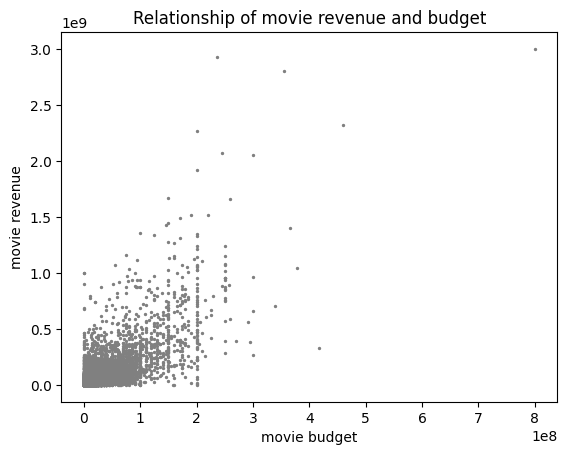

In [ ]:
#scatterplot of dependent and auxiliary variables
plt.scatter(x = df[x_var], y = df[y_var], c = 'gray', s = 2)
plt.title('Relationship of movie revenue and budget')
plt.xlabel('movie budget')
plt.ylabel('movie revenue')
plt.show()

In [ ]:
corr = np.corrcoef(df[x_var], df[y_var])[0, 1]
print(f"The correlation coefficient between movie revenue and budget is {corr:.2f}.")

The correlation coefficient between movie revenue and budget is 0.75.


In [ ]:
Bhats = np.zeros(n_iter)
Bhat_sds = np.zeros(n_iter)

for i in range(n_iter):
    sample = df.sample(n, random_state = rng) #take a simple random sample
    yi = sample[y_var] #define y variable
    xi = sample[x_var] #define x auxiliary variable

    Bhat = sum(yi) / sum(xi) #estimate the ratio
    Bhats[i] = Bhat
    Bhat_var = (1 / (n * xi.mean()**2)) * (sum((yi - Bhat * xi)**2) / n - 1) #estimate standard error of ratio estimate
    Bhat_sds[i] = np.sqrt(Bhat_var)

### Confidence interval estimate

In [ ]:
lower_CI = np.percentile(Bhats, 5)
upper_CI = np.percentile(Bhats, 95)

print(f"The estimated 95% confidence interval for the ratio of movie revenue and budget is between {lower_CI:.2f} and {upper_CI:.2f} USD.")

The estimated 95% confidence interval for the ratio of movie revenue and budget is between 2.74 and 3.33 USD.


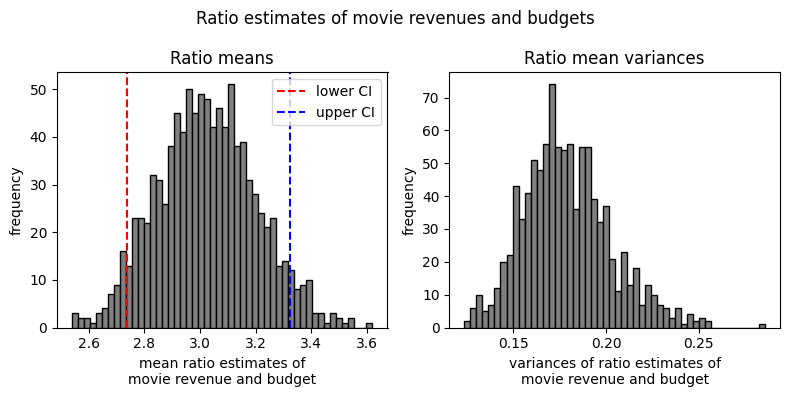

In [ ]:
#plot the sampling means and their variance
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (8,4))
fig.suptitle("Ratio estimates of movie revenues and budgets")

#sample means
ax1.hist(Bhats, bins = 50, color = 'gray', edgecolor = 'black')
ax1.set_ylabel('frequency')
ax1.set_xlabel('mean ratio estimates of\nmovie revenue and budget')
ax1.set_title('Ratio means')
ax1.axvline(x = lower_CI, color = 'red', linestyle = '--', label = 'lower CI')
ax1.axvline(x = upper_CI, color = 'blue', linestyle = '--', label = 'upper CI')
ax1.legend()

#sample mean variances
ax2.hist(Bhat_sds, bins = 50, color = 'gray', edgecolor = 'black')
ax2.set_ylabel('frequency')
ax2.set_xlabel('variances of ratio estimates of\nmovie revenue and budget')
ax2.set_title('Ratio mean variances')

plt.tight_layout()
plt.show()

### Estimate movie revenues given a budget

In [ ]:
Bhat = Bhats.mean() #Bhat
Bhat_sd = Bhat_sds.mean() #Bhat standard deviation
tx = [500000,1000000,2000000] #create list of budeget amounts

ty_estimates = {}
for i in tx:
    ty = Bhat * i #estimate pledge amount
    ty_sd = Bhat_sd * i #estimate SE of pledge amount
    ty_estimates[i] = [ty, ty_sd] #store results

ty_estimates_df = pd.DataFrame(ty_estimates).T #convert to data frame
ty_estimates_df.columns = ['revenue','SE'] #add column names
ty_estimates_df.index.name = 'budget' #add index name
display(ty_estimates_df)

,revenue,SE
budget,,
500000,1.512654e+06,89402.338615
1000000,3.025309e+06,178804.677230
2000000,6.050618e+06,357609.354461


## Conclusion

Given the high positive correlation between movie budgets and revenues, budget makes an excellent auxiliary variable to estimate revenue. In general, the higher the budget, the greater the revenue the movie will generate. This makes sense given that higher budget movies are able create a higher quality movie experience leading to more revenue.

# Analysis of Variance (ANOVA): Investigating the Impact of adult on Revenue

Our study aimed to investigate the influence of the 'adult' classification on movie revenue. A visual examination of revenue distribution via boxplots revealed a notable disparity between 'adult' and non-adult categories.

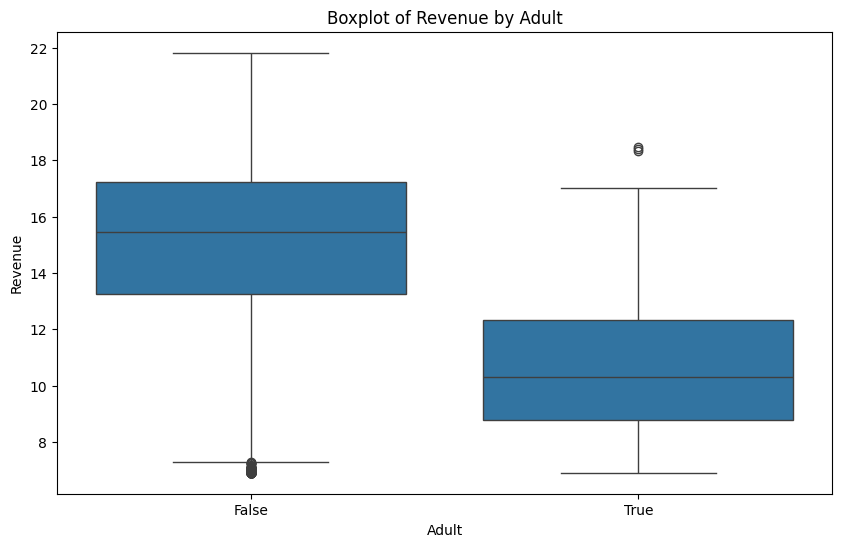

In [ ]:
# Log-transform the revenue
df["log_revenue"] = np.log(df['revenue'])

# Create a boxplot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.boxplot(x='adult', y='log_revenue', data=df)

# Set the labels and title
plt.xlabel('Adult')
plt.ylabel('Revenue')
plt.title('Boxplot of Revenue by Adult')

# Show the plot
plt.show()

Null Hypothesis (H0): There is no significant difference in the mean log revenue between the 'adult' and 'non-adult' movie categories.

Alternative Hypothesis (H1): There is a significant difference in the mean log revenue between the 'adult' and 'non-adult' movie categories.

In [ ]:

# We'll use ordinary least squares (OLS) regression for the ANOVA
# Define the model formula
formula = 'log_revenue ~ C(adult)'

# Fit the model
model = ols(formula, data=df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                 sum_sq       df          F        PR(>F)
C(adult)     584.575814      1.0  67.473326  2.299174e-16
Residual  137130.722405  15828.0        NaN           NaN


. Subsequent ANOVA testing confirmed this observation, yielding a p-value of 0 and indicating a significant impact of the 'adult' classification on revenue.

##Linear Regression

##Checks

/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:55: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


Diagnostic plots for Box-Cox Model:
Saving diagnostic plots for boxcox...
boxcox_residuals_vs_fitted.png saved.
boxcox_qq.png saved.
boxcox_scale_location.png saved.
boxcox_residuals_vs_leverage.png saved.


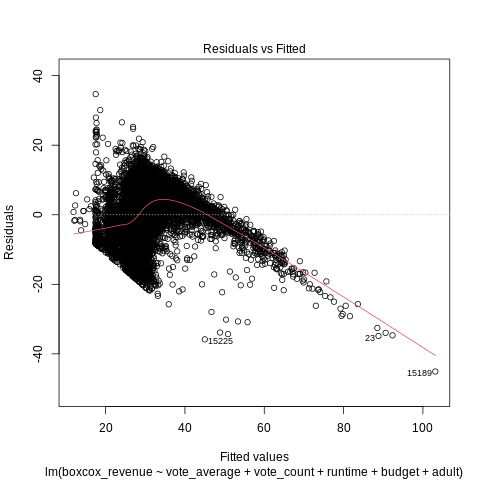

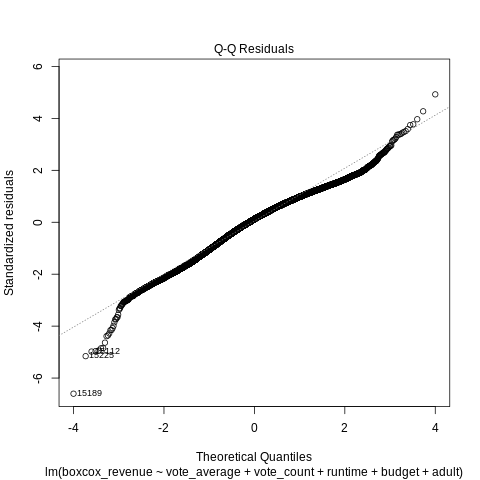

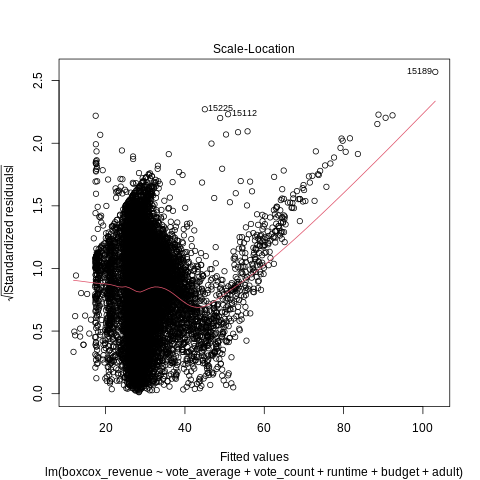

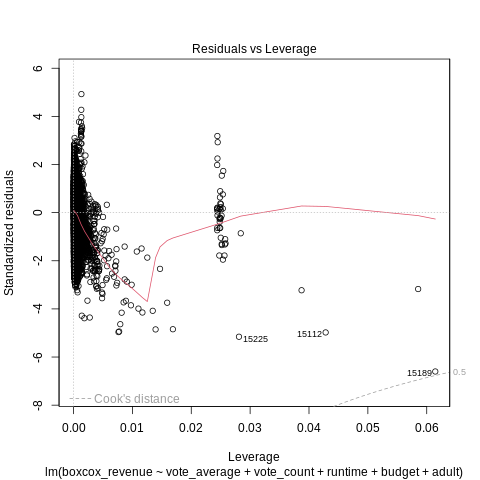


Diagnostic plots for Log Model:
Saving diagnostic plots for log...
log_residuals_vs_fitted.png saved.
log_qq.png saved.
log_scale_location.png saved.
log_residuals_vs_leverage.png saved.


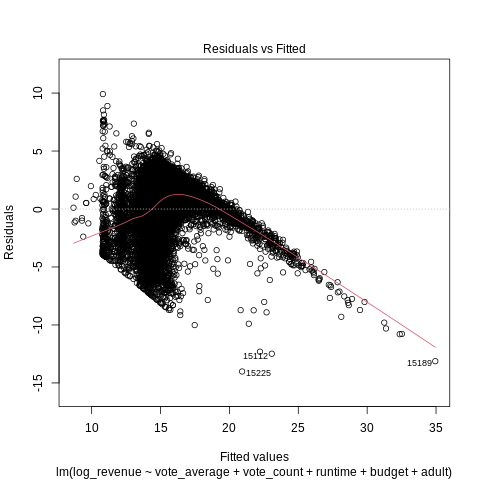

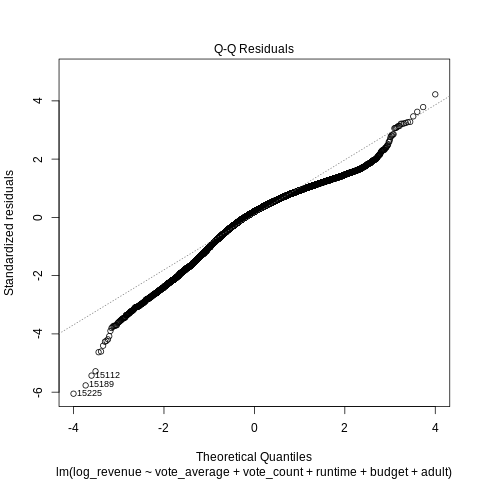

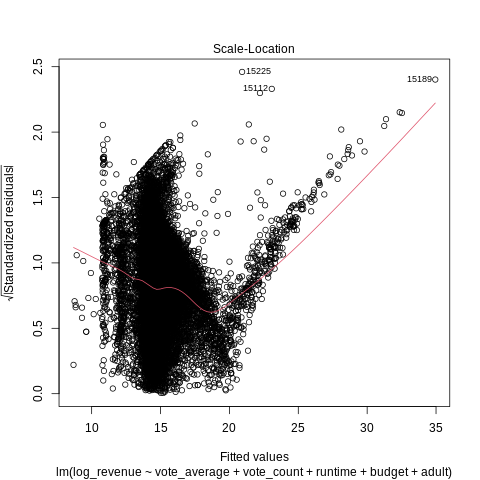

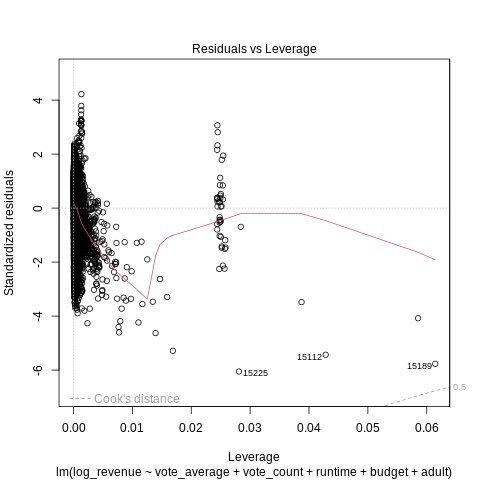

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from IPython.display import Image

# Load the dataset
movie_data = pd.read_csv('TMDB_cleaned_movie_dataset.csv')

# Compute the log of revenue
movie_data['log_revenue'] = np.log1p(movie_data['revenue'])

# Apply the Box-Cox transformation
revenue_transformed, best_lambda = stats.boxcox(movie_data['revenue'])
movie_data['boxcox_revenue'] = revenue_transformed

# Activate automatic Pandas to R DataFrame conversion
pandas2ri.activate()

# Update the DataFrame in R's global environment
ro.globalenv['df'] = pandas2ri.py2rpy(movie_data)

# Convert 'adult' column to factor in R
ro.r('df$adult <- as.factor(df$adult)')

# Define a function to save and display diagnostic plots to files
def save_and_display_diagnostic_plots(model_name, model_formula):
    print(f"Saving diagnostic plots for {model_name}...")
    linear_model = ro.r(f'''
    linear_model <- lm({model_formula}, data = df)
    linear_model
    ''')

    # Define the plots to be saved and displayed
    plot_files = []
    plot_names = ["residuals_vs_fitted", "qq", "scale_location", "residuals_vs_leverage"]
    for plot_name in plot_names:
        file_name = f"{model_name}_{plot_name}.png"
        plot_files.append(file_name)
        ro.r(f'''
        png(file="{file_name}")
        plot(linear_model, which={plot_name_mapping[plot_name]})
        dev.off()
        ''')
        print(f"{file_name} saved.")

    # Display the plots
    for file in plot_files:
        display(Image(filename=file))

    return linear_model

# Map of plot names to their 'which' argument in R's plot function
plot_name_mapping = {
    "residuals_vs_fitted": "1",
    "qq": "2",
    "scale_location": "3",
    "residuals_vs_leverage": "5"
}

# Save and display diagnostic plots for boxcox_revenue model
print("Diagnostic plots for Box-Cox Model:")
boxcox_model = save_and_display_diagnostic_plots("boxcox", "boxcox_revenue ~ vote_average + vote_count + runtime + budget + adult")

# Save and display diagnostic plots for log_revenue model
print("\nDiagnostic plots for Log Model:")
log_model = save_and_display_diagnostic_plots("log", "log_revenue ~ vote_average + vote_count + runtime + budget + adult")

Homoscedasticity: Likely not met due to pattern seen in fitted vs residuals plot, the scale-location plot further proves a heteroscedasticity trend
Normality: Q-Q plot looks like most points fall on the line, which supports the argument of normality
Outliers: From the residuals vs leverage plot, it appears that there are a few influencial outliers shown within the dataset.
Further analysis was done checking if the boxcox revenue could be applied to have the model match any of the previously unmatched checks. The results even with the boxcox transformation were largely similar, so the log revenue was chosen as the target variable, since the log transformation gave a more normal curve.


##Step Forward, Step Backward, & both

In [ ]:
import pandas as pd
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
import numpy as np

movie_data = pd.read_csv('TMDB_cleaned_movie_dataset.csv')

movie_data['log_revenue'] = np.log1p(movie_data['revenue'])

pandas2ri.activate()

with localconverter(ro.default_converter + pandas2ri.converter):
    df = ro.conversion.py2rpy(movie_data)

ro.globalenv['df'] = df

r_code = '''
df$adult <- as.factor(df$adult)

model <- lm(log_revenue ~ vote_average + vote_count + runtime + budget + adult, data = df)
backward_model <- step(model, direction = "backward")
null_model <- lm(log_revenue ~ 1, data = df)
forward_model <- step(null_model, direction = "forward", scope = formula(model))
both_model <- step(null_model, direction = "both", scope = formula(model))

summary(backward_model)
summary(forward_model)
summary(both_model)
'''

model_vars = ro.r(r_code)

/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:55: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


Start:  AIC=27034.01
log_revenue ~ vote_average + vote_count + runtime + budget + 
    adult

               Df Sum of Sq   RSS   AIC
<none>                      87262 27034
- adult         1     190.2 87453 27066
- runtime       1    2929.2 90192 27555
- vote_count    1    3139.4 90402 27592
- vote_average  1    4468.2 91731 27822
- budget        1    9609.3 96872 28686
Start:  AIC=34246.25
log_revenue ~ 1

               Df Sum of Sq    RSS   AIC
+ budget        1     34944 102767 29615
+ vote_count    1     30135 107576 30339
+ vote_average  1     13339 124372 32636
+ runtime       1     11612 126099 32854
+ adult         1       585 137126 34181
<none>                      137711 34246

Step:  AIC=29614.85
log_revenue ~ budget

               Df Sum of Sq    RSS   AIC
+ vote_average  1    9017.6  93749 28163
+ runtime       1    5936.6  96830 28675
+ vote_count    1    5577.8  97189 28734
+ adult         1     444.6 102322 29548
<none>                      102767 29615

Step:  AIC=

The results from the forward and backward stepwise regression yeilded the same results. The variables: adult, runtime, vote_count, vote_average, and budget were used in the multilinear analysis further in this document.

##Basic model

\begin{align*}
H_0 &: \beta_i = 0 \\
H_A &: \beta_i \neq 0
\end{align*}

In [ ]:
import pandas as pd
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
import numpy as np

movie_data = pd.read_csv('TMDB_cleaned_movie_dataset.csv')

movie_data['log_revenue'] = np.log1p(movie_data['revenue'])

pandas2ri.activate()

with localconverter(ro.default_converter + pandas2ri.converter):
    df = ro.conversion.py2rpy(movie_data)
ro.globalenv['df'] = df

ro.r('''
library(stats)
linear_model <- lm(log_revenue ~ budget, data = df)
print(summary(linear_model))
''')

/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:55: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():



Call:
lm(formula = log_revenue ~ budget, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.6509  -1.4190   0.5408   1.8493   6.3580 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.437e+01  2.227e-02  645.02   <2e-16 ***
budget      4.513e-08  6.152e-10   73.36   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.548 on 15828 degrees of freedom
Multiple R-squared:  0.2538,	Adjusted R-squared:  0.2537 
F-statistic:  5382 on 1 and 15828 DF,  p-value: < 2.2e-16



call,"Call: lm(formula = log_revenue ~ budget, data = df) Coefficients: (Intercept) budget 1.437e+01 4.513e-08"
terms,"log_revenue ~ budget attr(,""variables"") list(log_revenue, budget) attr(,""factors"") budget log_revenue 0 budget 1 attr(,""term.labels"") [1] ""budget"" attr(,""order"") [1] 1 attr(,""intercept"") [1] 1 attr(,""response"") [1] 1 attr(,"".Environment"") attr(,""predvars"") list(log_revenue, budget) attr(,""dataClasses"") log_revenue budget ""numeric"" ""numeric"""
residuals,[-1.05523615 -1.44338977 -1.98732296 ... -7.45659936 -2.85684185 -2.8548108 ]
...,...
adj.r.squared,[0.25370464]
fstatistic,[5.38210116e+03 1.00000000e+00 1.58280000e+04]
cov.unscaled,[[ 7.63940825e-05 -8.77975794e-13] [-8.77975794e-13 5.82959989e-20]]


Based on our results we reject the null hypothesis

$$
log(revenue) = \beta_0 + \beta_1 \times budget
$$
$$
log(\text{{revenue}}) = 14.37 + (4.513 \times 10^{-8}) \times \text{{budget}}
$$
$$
\text{{revenue}} = e^{\log(\text{{revenue}})}
$$

##Multilinear model

\begin{align*}
H_0 &: \beta_1 = \beta_2 = \ldots = \beta_p = 0 \\
H_A &: \text{At least one } \beta_i \neq 0
\end{align*}

In [ ]:
import pandas as pd
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
import numpy as np

movie_data = pd.read_csv('TMDB_cleaned_movie_dataset.csv')

movie_data['log_revenue'] = np.log1p(movie_data['revenue'])

pandas2ri.activate()

with localconverter(ro.default_converter + pandas2ri.converter):
    df = ro.conversion.py2rpy(movie_data)
ro.globalenv['df'] = df

ro.r('''
library(stats)
df$adult <- as.factor(df$adult)
multilinear_model <- lm(log_revenue ~ vote_average + vote_count + runtime + budget + adult, data = df)
print(summary(multilinear_model))
''')

/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:55: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():



Call:
lm(formula = log_revenue ~ vote_average + vote_count + runtime + 
    budget + adult, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.0132  -1.2914   0.4698   1.6985   9.9104 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.077e+01  8.719e-02 123.489  < 2e-16 ***
vote_average  3.255e-01  1.144e-02  28.465  < 2e-16 ***
vote_count    2.329e-04  9.763e-06  23.860  < 2e-16 ***
runtime       1.539e-02  6.676e-04  23.047  < 2e-16 ***
budget        3.013e-08  7.217e-10  41.744  < 2e-16 ***
adultTRUE    -2.161e+00  3.681e-01  -5.872 4.39e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.348 on 15824 degrees of freedom
Multiple R-squared:  0.3663,	Adjusted R-squared:  0.3661 
F-statistic:  1830 on 5 and 15824 DF,  p-value: < 2.2e-16



call,"Call: lm(formula = log_revenue ~ vote_average + vote_count + runtime + budget + adult, data = df) Coefficients: (Intercept) vote_average vote_count runtime budget 1.077e+01 3.255e-01 2.329e-04 1.539e-02 3.013e-08 adultTRUE -2.161e+00"
terms,"log_revenue ~ vote_average + vote_count + runtime + budget + adult attr(,""variables"") list(log_revenue, vote_average, vote_count, runtime, budget, adult) attr(,""factors"") vote_average vote_count runtime budget adult log_revenue 0 0 0 0 0 vote_average 1 0 0 0 0 vote_count 0 1 0 0 0 runtime 0 0 1 0 0 budget 0 0 0 1 0 adult 0 0 0 0 1 attr(,""term.labels"") [1] ""vote_average"" ""vote_count"" ""runtime"" ""budget"" ""adult"" attr(,""order"") [1] 1 1 1 1 1 attr(,""intercept"") [1] 1 attr(,""response"") [1] 1 attr(,"".Environment"") attr(,""predvars"") list(log_revenue, vote_average, vote_count, runtime, budget, adult) attr(,""dataClasses"") log_revenue vote_average vote_count runtime budget adult ""numeric"" ""numeric"" ""numeric"" ""numeric"" ""numeric"" ""factor"""
residuals,[-8.09094013 -8.29625853 -7.85471578 ... -4.01184152 -0.41075184 -0.07088767]
...,...
adj.r.squared,[0.36613626]
fstatistic,[1.82964881e+03 5.00000000e+00 1.58240000e+04]
cov.unscaled,[[ 1.37846090e-03 -1.08348850e-04 1.90963668e-08 -6.42396872e-06 -1.54174559e-13 -4.37622856e-04] [-1.08348850e-04 2.37168728e-05 -3.67693805e-09 -3.13534349e-07 7.68667939e-14 2.98891201e-05] [ 1.90963668e-08 -3.67693805e-09 1.72842702e-11 -2.94028685e-11 -7.67665919e-16 1.99116195e-09] [-6.42396872e-06 -3.13534349e-07 -2.94028685e-11 8.08259304e-08 -8.97439435e-15 1.80366452e-06] [-1.54174559e-13 7.68667939e-14 -7.67665919e-16 -8.97439435e-15 9.44615533e-20 8.68005223e-14] [-4.37622856e-04 2.98891201e-05 1.99116195e-09 1.80366452e-06 8.68005223e-14 2.45657174e-02]]


Based on our results we reject the null hypothesis

$$
\hat{\log(\text{revenue})} = \beta_{0} + \beta_{1} \cdot \text{vote average} + \beta_{2} \cdot \text{vote count} + \beta_{3} \cdot \text{runtime} + \beta_{4} \cdot \text{budget} + \beta_{5} \cdot \text{adultTRUE}
$$

$$
\hat{\log(\text{revenue})} = 1.077e+01 + 3.255e-01 \cdot \text{vote average} + 2.329e-04 \cdot \text{vote count} + 1.539e-02 \cdot \text{runtime} + 3.013e-08 \cdot \text{budget} - 2.161\cdot \text{adultTRUE}
$$

##Interaction terms

In [ ]:
import pandas as pd
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
import numpy as np

movie_data = pd.read_csv('TMDB_cleaned_movie_dataset.csv')

movie_data['log_revenue'] = np.log1p(movie_data['revenue'])

pandas2ri.activate()

with localconverter(ro.default_converter + pandas2ri.converter):
    df = ro.conversion.py2rpy(movie_data)
ro.globalenv['df'] = df

ro.r('''
library(stats)
df$adult <- as.factor(df$adult)
full_model <- lm(log_revenue ~ (vote_average + vote_count + runtime + budget + adult)^2, data = df)

library(MASS)
best_model <- stepAIC(full_model, direction="both")
print(summary(best_model))
''')


/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:55: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


Start:  AIC=24987.75
log_revenue ~ (vote_average + vote_count + runtime + budget + 
    adult)^2

                          Df Sum of Sq   RSS   AIC
- runtime:adult            1       7.7 76592 24987
<none>                                 76584 24988
- budget:adult             1      10.9 76595 24988
- vote_count:runtime       1      21.8 76606 24990
- vote_average:runtime     1      43.3 76628 24995
- vote_average:adult       1      44.5 76629 24995
- vote_count:adult         1     138.0 76722 25014
- runtime:budget           1     378.8 76963 25064
- vote_average:budget      1     706.4 77291 25131
- vote_average:vote_count  1    1812.5 78397 25356
- vote_count:budget        1    5421.7 82006 26068

Step:  AIC=24987.34
log_revenue ~ vote_average + vote_count + runtime + budget + 
    adult + vote_average:vote_count + vote_average:runtime + 
    vote_average:budget + vote_average:adult + vote_count:runtime + 
    vote_count:budget + vote_count:adult + runtime:budget + budget:adult

  

call,"Call: lm(formula = log_revenue ~ vote_average + vote_count + runtime + budget + adult + vote_average:vote_count + vote_average:runtime + vote_average:budget + vote_average:adult + vote_count:runtime + vote_count:budget + vote_count:adult + runtime:budget, data = df) Coefficients: (Intercept) vote_average vote_count 1.075e+01 2.319e-01 2.165e-03 runtime budget adultTRUE 1.449e-02 2.351e-08 -1.390e+00 vote_average:vote_count vote_average:runtime vote_average:budget -2.349e-04 5.435e-04 7.222e-09 vote_average:adultTRUE vote_count:runtime vote_count:budget -2.927e-01 8.944e-07 -3.795e-12 vote_count:adultTRUE runtime:budget 6.934e-02 -2.540e-10"
terms,"log_revenue ~ vote_average + vote_count + runtime + budget + adult + vote_average:vote_count + vote_average:runtime + vote_average:budget + vote_average:adult + vote_count:runtime + vote_count:budget + vote_count:adult + runtime:budget attr(,""variables"") list(log_revenue, vote_average, vote_count, runtime, budget, adult) attr(,""factors"") vote_average vote_count runtime budget adult log_revenue 0 0 0 0 0 vote_average 1 0 0 0 0 vote_count 0 1 0 0 0 runtime 0 0 1 0 0 budget 0 0 0 1 0 adult 0 0 0 0 1 vote_average:vote_count vote_average:runtime vote_average:budget log_revenue 0 0 0 vote_average 1 1 1 vote_count 1 0 0 runtime 0 1 0 budget 0 0 1 adult 0 0 0 vote_average:adult vote_count:runtime vote_count:budget log_revenue 0 0 0 vote_average 1 0 0 vote_count 0 1 1 runtime 0 1 0 budget 0 0 1 adult 1 0 0 vote_count:adult runtime:budget log_revenue 0 0 vote_average 0 0 vote_count 1 0 runtime 0 1 budget 0 1 adult 1 0 attr(,""term.labels"") [1] ""vote_average"" ""vote_count"" [3] ""runtime"" ""budget"" [5] ""adult"" ""vote_average:vote_count"" [7] ""vote_average:runtime"" ""vote_average:budget"" [9] ""vote_average:adult"" ""vote_count:runtime"" [11] ""vote_count:budget"" ""vote_count:adult"" [13] ""runtime:budget"" attr(,""order"") [1] 1 1 1 1 1 2 2 2 2 2 2 2 2 attr(,""intercept"") [1] 1 attr(,""response"") [1] 1 attr(,"".Environment"") attr(,""predvars"") list(log_revenue, vote_average, vote_count, runtime, budget, adult) attr(,""dataClasses"") log_revenue vote_average vote_count runtime budget adult ""numeric"" ""numeric"" ""numeric"" ""numeric"" ""numeric"" ""factor"""
residuals,[ 7.08142552e+00 6.97109836e+00 8.78324430e+00 ... -3.98494810e+00 -3.22936955e-01 -4.29220498e-03]
...,...
adj.r.squared,[0.44332012]
fstatistic,[9.7066571e+02 1.3000000e+01 1.5816000e+04]
cov.unscaled,[[ 2.81737407e-03 -3.89821285e-04 -7.05586950e-09 -2.28055782e-05 -4.29344890e-12 -1.26924920e-03 6.37897141e-09 3.08437208e-06 1.13102867e-13 1.78062276e-04 -2.93315647e-10 -3.20914707e-17 3.64352736e-07 3.14696056e-14] [-3.89821285e-04 8.25256118e-05 -2.56042452e-08 2.90269576e-06 2.93224697e-13 1.97436743e-04 4.85833419e-10 -6.38262716e-07 -1.39382326e-13 -3.76515782e-05 1.74524115e-10 -8.61228651e-18 -1.23038050e-07 6.16365373e-15] [-7.05586950e-09 -2.56042452e-08 1.32858323e-09 -8.23169722e-10 -1.00210155e-14 5.45373220e-08 -1.66446369e-10 3.07595251e-10 4.92015725e-16 9.17942901e-09 -3.14868947e-13 5.50036137e-20 -6.05572053e-10 6.92270385e-18] [-2.28055782e-05 2.90269576e-06 -8.23169722e-10 2.71529751e-07 1.09867938e-14 4.39799900e-06 7.15979695e-11 -3.58929143e-08 6.99608303e-15 -4.74432916e-07 3.05592463e-12 -8.73008514e-20 -2.30701785e-09 -5.04317504e-16] [-4.29344890e-12 2.93224697e-13 -1.00210155e-14 1.09867938e-14 1.27560915e-18 2.24692697e-12 1.11137359e-15 1.85490220e-15 -1.45536027e-19 6.37495688e-13 1.24099549e-17 8.40673976e-24 -5.05777067e-14 -2.59600598e-21] [-1.26924920e-03 1.97436743e-04 5.45373220e-08 4.39799900e-06 2.24692697e-12 5.43817059e-02 -1.04314874e-08 -7.00548798e-07 -3.84663826e-13 -6.40654129e-03 1.04776291e-10 -5.25848342e-18 -2.21236507e-04 6.49918629e-15] [ 6.37897141e-09 4.85833419e-10 -1.66446369e-10 7.15979695e-11 1.11137359e-15 -1.04314874e-08 3.03587033e-11 -1.80139413e-11 -4.79414719e-16 -3.24640708e-10 -5.30357174e-13 2.54583842e-20 9.61940221e-11 2.30529199e-17]

In [ ]:
import pandas as pd
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
import numpy as np

movie_data = pd.read_csv('TMDB_cleaned_movie_dataset.csv')

movie_data['log_revenue'] = np.log1p(movie_data['revenue'])

pandas2ri.activate()

with localconverter(ro.default_converter + pandas2ri.converter):
    df = ro.conversion.py2rpy(movie_data)
ro.globalenv['df'] = df

ro.r('''
library(stats)
df$adult <- as.factor(df$adult)
specified_model <- lm(log_revenue ~ vote_average + vote_count + runtime + budget + adult +
                      vote_average:vote_count + vote_average:runtime + vote_average:adult +
                      runtime:budget + budget:adult, data = df)
print(summary(specified_model))
''')

/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:55: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():



Call:
lm(formula = log_revenue ~ vote_average + vote_count + runtime + 
    budget + adult + vote_average:vote_count + vote_average:runtime + 
    vote_average:adult + runtime:budget + budget:adult, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.3828  -1.2576   0.4665   1.6268  10.0452 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              1.063e+01  1.215e-01  87.538  < 2e-16 ***
vote_average             2.611e-01  2.057e-02  12.694  < 2e-16 ***
vote_count               2.159e-03  8.311e-05  25.979  < 2e-16 ***
runtime                  1.437e-02  1.192e-03  12.048  < 2e-16 ***
budget                   5.060e-08  2.112e-09  23.962  < 2e-16 ***
adultTRUE               -8.689e-01  5.276e-01  -1.647  0.09961 .  
vote_average:vote_count -2.477e-04  1.075e-05 -23.050  < 2e-16 ***
vote_average:runtime     8.382e-04  1.910e-04   4.389 1.15e-05 ***
vote_average:adultTRUE  -2.511e-01  9.201e-02  -2.729  0.00636 ** 


call,"Call: lm(formula = log_revenue ~ vote_average + vote_count + runtime + budget + adult + vote_average:vote_count + vote_average:runtime + vote_average:adult + runtime:budget + budget:adult, data = df) Coefficients: (Intercept) vote_average vote_count 1.063e+01 2.611e-01 2.159e-03 runtime budget adultTRUE 1.437e-02 5.060e-08 -8.689e-01 vote_average:vote_count vote_average:runtime vote_average:adultTRUE -2.477e-04 8.382e-04 -2.511e-01 runtime:budget budget:adultTRUE -2.462e-10 2.129e-08"
terms,"log_revenue ~ vote_average + vote_count + runtime + budget + adult + vote_average:vote_count + vote_average:runtime + vote_average:adult + runtime:budget + budget:adult attr(,""variables"") list(log_revenue, vote_average, vote_count, runtime, budget, adult) attr(,""factors"") vote_average vote_count runtime budget adult log_revenue 0 0 0 0 0 vote_average 1 0 0 0 0 vote_count 0 1 0 0 0 runtime 0 0 1 0 0 budget 0 0 0 1 0 adult 0 0 0 0 1 vote_average:vote_count vote_average:runtime vote_average:adult log_revenue 0 0 0 vote_average 1 1 1 vote_count 1 0 0 runtime 0 1 0 budget 0 0 0 adult 0 0 1 runtime:budget budget:adult log_revenue 0 0 vote_average 0 0 vote_count 0 0 runtime 1 0 budget 1 1 adult 0 1 attr(,""term.labels"") [1] ""vote_average"" ""vote_count"" [3] ""runtime"" ""budget"" [5] ""adult"" ""vote_average:vote_count"" [7] ""vote_average:runtime"" ""vote_average:adult"" [9] ""runtime:budget"" ""budget:adult"" attr(,""order"") [1] 1 1 1 1 1 2 2 2 2 2 attr(,""intercept"") [1] 1 attr(,""response"") [1] 1 attr(,"".Environment"") attr(,""predvars"") list(log_revenue, vote_average, vote_count, runtime, budget, adult) attr(,""dataClasses"") log_revenue vote_average vote_count runtime budget adult ""numeric"" ""numeric"" ""numeric"" ""numeric"" ""numeric"" ""factor"""
residuals,[-0.72852037 0.01632553 0.61338679 ... -3.86998977 -0.2026914 0.11450047]
...,...
adj.r.squared,[0.39708042]
fstatistic,[1.04349159e+03 1.00000000e+01 1.58190000e+04]
cov.unscaled,[[ 2.81389699e-03 -3.87403712e-04 -1.31732424e-08 -2.28198229e-05 -3.30202962e-12 -1.28049437e-03 2.21580921e-09 3.07484154e-06 1.90058301e-04 2.66874945e-14 -7.86734978e-12] [-3.87403712e-04 8.06488191e-05 -2.08512602e-08 2.91403663e-06 -4.33175333e-13 1.98214812e-04 2.50467662e-09 -6.26876138e-07 -4.02951597e-05 5.36843417e-15 1.84040132e-12] [-1.31732424e-08 -2.08512602e-08 1.31695278e-09 -8.53165479e-10 -8.13604223e-15 6.35241354e-08 -1.69127423e-10 2.74951820e-10 2.83745250e-09 1.75232008e-17 3.44017766e-15] [-2.28198229e-05 2.91403663e-06 -8.53165479e-10 2.71029797e-07 2.30047495e-14 4.59264321e-06 1.29717843e-10 -3.59020743e-08 -6.10123569e-07 -2.29395408e-16 8.84297906e-14] [-3.30202962e-12 -4.33175333e-13 -8.13604223e-15 2.30047495e-14 8.50241364e-19 1.51143443e-12 1.03054433e-15 4.09846902e-15 1.71610674e-13 -6.29149511e-21 3.12498997e-19] [-1.28049437e-03 1.98214812e-04 6.35241354e-08 4.59264321e-06 1.51143443e-12 5.30689439e-02 -1.00259921e-08 -7.22360118e-07 -6.70205248e-03 -8.54306669e-15 7.34955138e-11] [ 2.21580921e-09 2.50467662e-09 -1.69127423e-10 1.29717843e-10 1.03054433e-15 -1.00259921e-08 2.20186689e-11 -3.89862238e-11 4.37075172e-11 -2.90319414e-18 -2.89819531e-16] [ 3.07484154e-06 -6.26876138e-07 2.74951820e-10 -3.59020743e-08 4.09846902e-15 -7.22360118e-07 -3.89862238e-11 6.95527845e-09 1.79412864e-07 -4.87795207e-17 -1.93063791e-14] [ 1.90058301e-04 -4.02951597e-05 2.83745250e-09 -6.10123569e-07 1.71610674e-13 -6.70205248e-03 4.37075172e-11 1.79412864e-07 1.61404917e-03 -2.22565302e-15 -5.33101525e-11] [ 2.66874945e-14 5.36843417e-15 1.75232008e-17 -2.29395408e-16 -6.29149511e-21 -8.54306669e-15 -2.90319414e-18 -4.87795207e-17 -2.22565302e-15 5.39561044e-23 -3.56262512e-21] [-7.86734978e-12 1.84040132e-12 3.44017766e-15 8.84297906e-14 3.12498997e-19 7.34955138e-11 -2.89819531e-16 -1.93063791e-14 -5.33101525e-11 -3.56262512e-21 3.57043706e-17]]


In [ ]:
import pandas as pd
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
import numpy as np

movie_data = pd.read_csv('TMDB_cleaned_movie_dataset.csv')

movie_data['log_revenue'] = np.log1p(movie_data['revenue'])

pandas2ri.activate()

with localconverter(ro.default_converter + pandas2ri.converter):
    df = ro.conversion.py2rpy(movie_data)
ro.globalenv['df'] = df

ro.r('''
library(stats)
df$adult <- as.factor(df$adult)
specified_model <- lm(log_revenue ~ vote_average + vote_count + runtime + budget + adult +
                      vote_average:vote_count + vote_average:runtime + vote_average:adult +
                      runtime:budget, data = df)
print(summary(specified_model))
''')

/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:55: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():



Call:
lm(formula = log_revenue ~ vote_average + vote_count + runtime + 
    budget + adult + vote_average:vote_count + vote_average:runtime + 
    vote_average:adult + runtime:budget, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.2466  -1.2588   0.4662   1.6269  10.0406 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              1.064e+01  1.215e-01  87.600  < 2e-16 ***
vote_average             2.600e-01  2.056e-02  12.648  < 2e-16 ***
vote_count               2.157e-03  8.311e-05  25.956  < 2e-16 ***
runtime                  1.431e-02  1.192e-03  12.008  < 2e-16 ***
budget                   5.042e-08  2.109e-09  23.911  < 2e-16 ***
adultTRUE               -9.127e-01  5.269e-01  -1.732   0.0832 .  
vote_average:vote_count -2.475e-04  1.075e-05 -23.034  < 2e-16 ***
vote_average:runtime     8.498e-04  1.909e-04   4.452 8.56e-06 ***
vote_average:adultTRUE  -2.193e-01  8.972e-02  -2.444   0.0145 *  
runtime:budget 

call,"Call: lm(formula = log_revenue ~ vote_average + vote_count + runtime + budget + adult + vote_average:vote_count + vote_average:runtime + vote_average:adult + runtime:budget, data = df) Coefficients: (Intercept) vote_average vote_count 1.064e+01 2.600e-01 2.157e-03 runtime budget adultTRUE 1.431e-02 5.042e-08 -9.127e-01 vote_average:vote_count vote_average:runtime vote_average:adultTRUE -2.475e-04 8.498e-04 -2.193e-01 runtime:budget -2.440e-10"
terms,"log_revenue ~ vote_average + vote_count + runtime + budget + adult + vote_average:vote_count + vote_average:runtime + vote_average:adult + runtime:budget attr(,""variables"") list(log_revenue, vote_average, vote_count, runtime, budget, adult) attr(,""factors"") vote_average vote_count runtime budget adult log_revenue 0 0 0 0 0 vote_average 1 0 0 0 0 vote_count 0 1 0 0 0 runtime 0 0 1 0 0 budget 0 0 0 1 0 adult 0 0 0 0 1 vote_average:vote_count vote_average:runtime vote_average:adult log_revenue 0 0 0 vote_average 1 1 1 vote_count 1 0 0 runtime 0 1 0 budget 0 0 0 adult 0 0 1 runtime:budget log_revenue 0 vote_average 0 vote_count 0 runtime 1 budget 1 adult 0 attr(,""term.labels"") [1] ""vote_average"" ""vote_count"" [3] ""runtime"" ""budget"" [5] ""adult"" ""vote_average:vote_count"" [7] ""vote_average:runtime"" ""vote_average:adult"" [9] ""runtime:budget"" attr(,""order"") [1] 1 1 1 1 1 2 2 2 2 attr(,""intercept"") [1] 1 attr(,""response"") [1] 1 attr(,"".Environment"") attr(,""predvars"") list(log_revenue, vote_average, vote_count, runtime, budget, adult) attr(,""dataClasses"") log_revenue vote_average vote_count runtime budget adult ""numeric"" ""numeric"" ""numeric"" ""numeric"" ""numeric"" ""factor"""
residuals,[-0.73006935 0.00434984 0.60366039 ... -3.87415405 -0.20342531 0.11260767]
...,...
adj.r.squared,[0.39702626]
fstatistic,[1.15906198e+03 9.00000000e+00 1.58200000e+04]
cov.unscaled,[[ 2.81216344e-03 -3.86998185e-04 -1.24152097e-08 -2.28003377e-05 -3.23317142e-12 -1.26429986e-03 2.15194835e-09 3.07058743e-06 1.78311571e-04 2.59024808e-14] [-3.86998185e-04 8.05539546e-05 -2.10285861e-08 2.90947847e-06 -4.49283265e-13 1.94426445e-04 2.51961552e-09 -6.25880980e-07 -3.75472587e-05 5.55207163e-15] [-1.24152097e-08 -2.10285861e-08 1.31662131e-09 -8.61685842e-10 -8.16615204e-15 5.64427159e-08 -1.69099499e-10 2.76812023e-10 7.97397760e-09 1.78664659e-17] [-2.28003377e-05 2.90947847e-06 -8.61685842e-10 2.70810781e-07 2.22307765e-14 4.41061528e-06 1.30435645e-10 -3.58542578e-08 -4.78089156e-07 -2.20571777e-16] [-3.23317142e-12 -4.49283265e-13 -8.16615204e-15 2.22307765e-14 8.47506247e-19 8.68172161e-13 1.03308095e-15 4.26744621e-15 6.38202548e-13 -6.26031358e-21] [-1.26429986e-03 1.94426445e-04 5.64427159e-08 4.41061528e-06 8.68172161e-13 5.29176573e-02 -9.42941425e-09 -6.82618982e-07 -6.59231642e-03 -1.20959575e-15] [ 2.15194835e-09 2.51961552e-09 -1.69099499e-10 1.30435645e-10 1.03308095e-15 -9.42941425e-09 2.20163163e-11 -3.91429376e-11 -3.89021674e-10 -2.93211268e-18] [ 3.07058743e-06 -6.25880980e-07 2.76812023e-10 -3.58542578e-08 4.26744621e-15 -6.82618982e-07 -3.91429376e-11 6.94483894e-09 1.50586533e-07 -5.07059344e-17] [ 1.78311571e-04 -3.75472587e-05 7.97397760e-09 -4.78089156e-07 6.38202548e-13 -6.59231642e-03 -3.89021674e-10 1.50586533e-07 1.53445185e-03 -7.54500428e-15] [ 2.59024808e-14 5.55207163e-15 1.78664659e-17 -2.20571777e-16 -6.26031358e-21 -1.20959575e-15 -2.93211268e-18 -5.07059344e-17 -7.54500428e-15 5.36006214e-23]]


$$
\hat{\log(\text{revenue})} = \beta_0 + \beta_1 \cdot \text{Vote Average} + \beta_2 \cdot \text{Vote Count} + \beta_3 \cdot \text{Runtime} + \beta_4 \cdot \text{Budget} + \beta_5 \cdot \text{Adult} + \beta_6 \cdot (\text{Vote Average} \times \text{Vote Count}) + \beta_7 \cdot (\text{Vote Average} \times \text{Runtime}) + \beta_8 \cdot (\text{Vote Average} \times \text{Adult}) + \beta_9 \cdot (\text{Runtime} \times \text{Budget})
$$

$$
\hat{\log(\text{revenue})} = 10.646 + 2.650 \cdot \text{Vote Average} + 3.11e-03 \cdot \text{Vote Count} + 1.431e-02 \cdot \text{Runtime} + 5.042e-02 \cdot \text{Budget} - 9.127e-01 \cdot \text{Adult} - 2.475e-04 \cdot (\text{Vote Average} \times \text{Vote Count}) + 1.957e-03 \cdot (\text{Vote Average} \times \text{Runtime}) - 2.193e-01 \cdot (\text{Vote Average} \times \text{Adult}) - 4.403e-01 \cdot (\text{Runtime} \times \text{Budget})
$$

##Higher Order model

In [ ]:
import pandas as pd
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
import numpy as np

movie_data = pd.read_csv('TMDB_cleaned_movie_dataset.csv')

movie_data['log_revenue'] = np.log1p(movie_data['revenue'])

pandas2ri.activate()

with localconverter(ro.default_converter + pandas2ri.converter):
    df = ro.conversion.py2rpy(movie_data)
ro.globalenv['df'] = df

ro.r('''
library(stats)
df$adult <- as.factor(df$adult)

higher_order_model <- lm(log_revenue ~ vote_average + vote_count + runtime + budget + adult +
                         I(vote_average^2) + I(vote_count^2) + I(runtime^2) + I(budget^2) +
                         vote_average:vote_count + vote_average:runtime +
                         vote_count:runtime + vote_count:budget +
                         runtime:budget +
                         adult:vote_average, data = df)
print(summary(higher_order_model))
''')

/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:55: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():



Call:
lm(formula = log_revenue ~ vote_average + vote_count + runtime + 
    budget + adult + I(vote_average^2) + I(vote_count^2) + I(runtime^2) + 
    I(budget^2) + vote_average:vote_count + vote_average:runtime + 
    vote_count:runtime + vote_count:budget + runtime:budget + 
    adult:vote_average, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6347 -1.1927  0.3151  1.4329 14.2398 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              9.405e+00  1.256e-01  74.869  < 2e-16 ***
vote_average             8.703e-01  3.311e-02  26.283  < 2e-16 ***
vote_count               9.418e-04  9.301e-05  10.126  < 2e-16 ***
runtime                  2.053e-02  1.451e-03  14.150  < 2e-16 ***
budget                   7.414e-08  2.844e-09  26.063  < 2e-16 ***
adultTRUE               -3.422e-01  4.888e-01  -0.700 0.483909    
I(vote_average^2)       -7.998e-02  3.309e-03 -24.169  < 2e-16 ***
I(vote_count^2)         -1.388e-08  1.437

<rpy2.robjects.vectors.ListVector object at 0x7e94dbd00900> [RTYPES.VECSXP]
R classes: ('summary.lm',)
[LangSexpV..., LangSexpV..., FloatSexp..., FloatSexp..., ..., FloatSexp..., FloatSexp..., FloatSexp..., FloatSexp...]
  call: <class 'rpy2.robjects.language.LangVector'>
  Rlang( lm(formula = log_revenue ~ vote_average + vote_count + runtime +  )
  terms: <class 'rpy2.robjects.Formula'>
  <rpy2.robjects.Formula object at 0x7e94db8a2080> [RTYPES.LANGSXP]
R classes: ('terms', 'formula')
  residuals: <class 'numpy.ndarray'>
  array([ 7.77899555,  6.94207484,  7.03712618, ..., -2.6991458 ,
        0.7175114 ,  1.09377232])
  coefficients: <class 'numpy.ndarray'>
  array([[ 9.40524159e+000,  1.25623180e-001,  7.48686793e+001,
         0.00000000e+000],
       [ 8.70311739e-001,  3.31125836e-002,  2.62834139e+001,
         4.63252089e-149],
       [ 9.41836856e-004,  9.30146387e-005,  1.01256842e+001,
         5.03089363e-024],
       [ 2.05271636e-002,  1.45071003e-003,  1.41497358e+001,
         3.53631402e-045],
       [ 7.41363489e-008,  2.84449298e-009,  2.60631154e+001,
         1.17341001e-146],
       [-3.42166762e-001,  4.88777590e-001, -7.00045929e-001,
         4.83908920e-001],
       [-7.99767029e-002,  3.30910403e-003, -2.41686880e+001,
         9.35467431e-127],
       [-1.38826510e-008,  1.43746264e-009, -9.65774733e+000,
         5.24224170e-022],
       [-2.75632672e-005,  2.22494538e-006, -1.23882894e+001,
         4.39923616e-035],
       [-8.20799306e-017,  4.13712146e-018, -1.98398648e+001,
         1.51881536e-086],
       [-4.61908813e-005,  1.30664328e-005, -3.53507971e+000,
         4.08816893e-004],
       [ 1.01544752e-003,  1.81475406e-004,  5.59551037e+000,
         2.23622928e-008],
       [ 2.15418487e-007,  3.77708149e-007,  5.70330525e-001,
         5.68461644e-001],
       [-1.82771385e-012,  1.42774477e-013, -1.28014046e+001,
         2.46721390e-037],
       [-2.29898305e-010,  2.14667233e-011, -1.07095201e+001,
         1.13360045e-026],
       [-1.12223468e-001,  8.32336921e-002, -1.34829377e+000,
         1.77583227e-001]])
...
  sigma: <class 'numpy.ndarray'>
  array([0.48270903])
  df: <class 'numpy.ndarray'>
  array([0.48221836])
  r.squared: <class 'numpy.ndarray'>
  array([9.83786806e+02, 1.50000000e+01, 1.58140000e+04])
  adj.r.squared: <class 'numpy.ndarray'>
  array([[ 3.50330526e-03, -4.95470642e-04,  4.10355825e-08,
        -3.16401893e-05, -2.98981713e-12, -1.41719819e-03,
         1.36770171e-05,  1.14658693e-13,  2.37384426e-08,
        -2.71273112e-21, -4.68573022e-09,  3.15513224e-06,
        -4.48701618e-11, -7.56266167e-17,  3.65257301e-14,
         1.51961500e-04],
       [-4.95470642e-04,  2.43402228e-04, -1.19802164e-07,
         8.59159250e-07, -1.76180294e-12,  3.20267591e-04,
        -1.97790610e-05, -1.02488333e-12,  2.65743765e-09,
         2.49258355e-21,  1.58432732e-08, -4.85173122e-07,
         1.72936152e-10,  1.38247739e-17,  9.57932225e-15,
        -2.51730319e-05],
       [ 4.10355825e-08, -1.19802164e-07,  1.92061811e-09,
         3.04891881e-11, -2.12191275e-14,  4.47708054e-08,
         1.26288831e-08,  1.44342917e-14, -1.54251528e-12,
         2.48154362e-23, -2.40150989e-10,  2.80499411e-10,
        -1.77240840e-12, -9.78326614e-19,  1.27527852e-16,
        -3.02812931e-08],
       [-3.16401893e-05,  8.59159250e-07,  3.04891881e-11,
         4.67196564e-07,  3.48154449e-14,  3.82229521e-06,
         2.41160532e-07, -4.06989735e-15, -4.56429938e-10,
         2.29138597e-23,  2.57828089e-11, -4.09744787e-08,
        -1.72786830e-12,  1.55209024e-18, -4.69941338e-16,
        -3.04508248e-07],
       [-2.98981713e-12, -1.76180294e-12, -2.12191275e-14,
         3.48154449e-14,  1.79617293e-18, -2.45635612e-13,
         1.78741518e-13, -1.15340835e-19, -2.47008607e-17,
        -1.74155012e-27,  1.12318164e-15,  2.31546174e-15,
         9.64545489e-17,  2.42735921e-23, -1.23611675e-20,
         1.22755630e-12],
       [-1.41719819e-03,  3.20267591e-04,  4.477080

$$
\hat{\log(\text{revenue})} = \beta_0 + \beta_1 \cdot \text{Vote Average} + \beta_2 \cdot \text{Vote Count} + \beta_3 \cdot \text{Runtime} + \beta_4 \cdot \text{Budget} + \beta_5 \cdot \text{Adult} + \beta_6 \cdot \text{Vote Average}^2 + \beta_7 \cdot \text{Vote Count}^2 + \beta_8 \cdot \text{Runtime}^2 + \beta_9 \cdot \text{Budget}^2 + \beta_{10} \cdot (\text{Vote Average} \times \text{Runtime}) + \beta_{11} \cdot (\text{Vote Average} \times \text{Vote Count}) + \beta_{12} \cdot (\text{Vote Count} \times \text{Runtime}) + \beta_{13} \cdot (\text{Vote Count} \times \text{Budget}) + \beta_{14} \cdot (\text{Runtime} \times \text{Budget}) + \beta_{15} \cdot (\text{Vote Average} \times \text{Adult})
$$

$$
\hat{\log(\text{revenue})} = 9.405 + 8.703 \cdot \text{Vote Average} + 9.418e-04 \cdot \text{Vote Count} + 2.053e-02 \cdot \text{Runtime} + 7.412e-02 \cdot \text{Budget} - 3.422e-01 \cdot \text{Adult} - 7.998e-02 \cdot \text{Vote Average}^2 - 1.388e-08 \cdot \text{Vote Count}^2 - 2.756e-05 \cdot \text{Runtime}^2 - 8.208e-17 \cdot \text{Budget}^2 - 4.619e-05 \cdot (\text{Vote Average} \times \text{Vote Count}) + 1.015e-03 \cdot (\text{Vote Average} \times \text{Runtime}) + 2.154e-07 \cdot (\text{Vote Count} \times \text{Runtime}) + 1.282e-12 \cdot (\text{Vote Count} \times \text{Budget}) - 2.299e-10 \cdot (\text{Runtime} \times \text{Budget}) - 1.122e-01 \cdot (\text{Vote Average} \times \text{Adult})
$$

##Linear Regression: Conclusions
The higher order model with several interaction terms was found to be the model of best fit when running through the linear regression steps.

In [ ]:
# Create the target variable 'y'
y = movie_data['log_revenue']

# Create the design matrix 'X' with the specified terms
X = pd.DataFrame()



X['vote_average'] = movie_data['vote_average']
X['vote_count'] = movie_data['vote_count']
X['runtime'] = movie_data['runtime']
X['budget'] = movie_data['budget']
X['adult'] = movie_data['adult']
X['vote_average_sq'] = movie_data['vote_average'] ** 2
X['vote_count_sq'] = movie_data['vote_count'] ** 2
X['runtime_sq'] = movie_data['runtime'] ** 2
X['budget_sq'] = movie_data['budget'] ** 2
X['vote_average:vote_count'] = movie_data['vote_average'] * movie_data['vote_count']
X['vote_average:runtime'] = movie_data['vote_average'] * movie_data['runtime']
X['vote_count:runtime'] = movie_data['vote_count'] * movie_data['runtime']
X['vote_count:budget'] = movie_data['vote_count'] * movie_data['budget']
X['runtime:budget'] = movie_data['runtime'] * movie_data['budget']
X['vote_average:adult'] = movie_data['vote_average'] * movie_data['adult']
X['intercept'] = 1  # Intercept term

# Print the shapes of X and y to verify
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)


# Initialize the linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Print the intercept and coefficients
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)


Shape of X: (15830, 16)
Shape of y: (15830,)
Intercept: 11.151169520578623
Coefficients: [-8.14307175e-04  1.37331837e-03  1.76522141e-02  8.08590791e-08
 -3.16612321e-06 -9.32968252e-03 -1.02986233e-08 -3.74451833e-05
 -9.15066634e-17 -1.03169565e-04  2.76963294e-03 -3.96841140e-07
 -1.86577918e-12 -2.67991551e-10 -3.34628660e-05  0.00000000e+00]


In [ ]:
# Calculate RMSE for the chosen Linear Regression Model
cv_score = cross_val_score(model, X, y, cv=5, scoring= 'neg_root_mean_squared_error')
print(cv_score)
print("mean cv negative root mean square of the chosen Linear Regression Model is", cv_score.mean())

[-331.95684245   -2.04561986   -2.11289475   -2.10650267   -3.40237184]
mean cv negative root mean square of the chosen Linear Regression Model is -68.32484631600076



We explored the cross-validation results of our linear regression model. The mean and standard deviation of the scores were relatively high, indicating potential instability in the model's performance

In [ ]:
movie_data = pd.read_csv('TMDB_cleaned_movie_dataset.csv')
movie_data['log_revenue'] = np.log1p(movie_data['revenue'])
Y= movie_data['log_revenue']
movie_data['adult'] = movie_data['adult'].map({False: 0, True: 1})
X= movie_data[["vote_average", "vote_count", "runtime", "budget","adult"]]






We conducted cross-validation for three models: Linear Regression (LR), Decision Tree (DT), and Random Forest (RF) in their default status

In [ ]:
# list of models
models = [LinearRegression(), DecisionTreeRegressor(random_state=42),  RandomForestRegressor(random_state=42)]
#scoring='neg_mean_squared_error'

In [ ]:
def compare_models_cross_validation():

  for model in models:

    cv_score = cross_val_score(model, X, Y, cv=5, scoring= 'neg_root_mean_squared_error')
    mean_rmse = cv_score.mean()
    std_rmse = cv_score.std()


    print('Cross Validation accuracies for the',model,'=', cv_score)
    print('mean cv neg root mean squared error',model,'=',mean_rmse)
    print('std cv neg root mean squared error', model,'=',std_rmse )
    print('------------------------------------------------------------' )

In [ ]:
compare_models_cross_validation()

Cross Validation accuracies for the LinearRegression() = [-16.23188013  -2.15490579  -2.11350806  -2.19467128  -3.51798207]
mean cv neg root mean squared error LinearRegression() = -5.2425894632048315
std cv neg root mean squared error LinearRegression() = 5.520027650225716
------------------------------------------------------------
Cross Validation accuracies for the DecisionTreeRegressor(random_state=42) = [-1.919473   -2.72727401 -2.87723951 -3.32820702 -3.70918489]
mean cv neg root mean squared error DecisionTreeRegressor(random_state=42) = -2.912275689314069
std cv neg root mean squared error DecisionTreeRegressor(random_state=42) = 0.6048427041128963
------------------------------------------------------------
Cross Validation accuracies for the RandomForestRegressor(random_state=42) = [-1.58682432 -1.74908053 -2.09512761 -2.23274682 -2.84885191]
mean cv neg root mean squared error RandomForestRegressor(random_state=42) = -2.102526237343202
std cv neg root mean squared error Ran

Upon analysis, Random Forest showed the lowest Root Mean Squared Error (RMSE) and standard deviation, indicating superior performance compared to LR and DT. This suggests Random Forest's potential suitability for our predictive task.

# Tune Model


Furthermore, we utilized GridSearchCV to fine-tune Decision Tree (DT) and Random Forest (RF) models.

Different hyperparameter values we tried:

*   max_depth - range(5,40,5) - 7 values
*   n_estimators - range(25,125,25) - 4 values

In [ ]:
param_grid={"randomforestclassifier__max_depth": range(5,40,5),
            "randomforestclassifier__n_estimators": range(25,125,25)}

In [ ]:
# creating a dictionary that contains hyperparameter values for the above mentioned models


model_hyperparameters = {


    'decision_tree_hyperparameters' : {

        'max_depth': range(5,20,5)
    },


    'random_forest_hyperparameters' : {

        'n_estimators' : range(25,125,25),
        'max_depth': range(5,20,5)
    }
}

In [ ]:
def ModelSelection(list_of_models, hyperparameters_dictionary):

  result = []

  i = 0

  for model in list_of_models:

    key = model_keys[i]

    params = hyperparameters_dictionary[key]

    i += 1

    print(model)
    print(params)
    print('---------------------------------')


    regressor = GridSearchCV(model, params, cv=5, scoring="neg_root_mean_squared_error")

    # fitting the data to classifier
    regressor.fit(X,Y)

    result.append({
        'model used' : model,
        'highest score' : regressor.best_score_,
        'best hyperparameters' : regressor.best_params_
    })

  result_dataframe = pd.DataFrame(result, columns = ['model used','highest score','best hyperparameters'])

  return result_dataframe

In [ ]:
model_keys = list(model_hyperparameters.keys())

In [ ]:
ModelSelection(models[1:], model_hyperparameters)

DecisionTreeRegressor(random_state=42)
{'max_depth': range(5, 20, 5)}
---------------------------------
RandomForestRegressor(random_state=42)
{'n_estimators': range(25, 125, 25), 'max_depth': range(5, 20, 5)}
---------------------------------


,model used,highest score,best hyperparameters
0,DecisionTreeRegressor(random_state=42),-2.175411,{'max_depth': 5}
1,RandomForestRegressor(random_state=42),-2.046018,"{'max_depth': 10, 'n_estimators': 50}"


 Our analysis showed that Random Forest continued to outperform Decision Tree, yielding a better RMSE score. The optimal parameters for the top-performing Random Forest model were identified as n_estimators = 50 and max_depth = 10.

Text(0.5, 0, 'Reduction in Gini impurity')

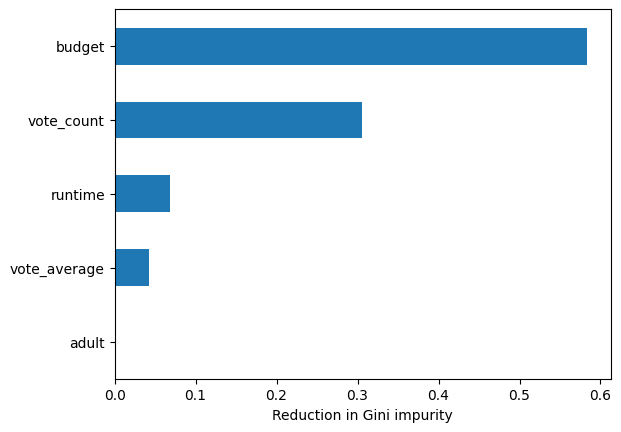

In [ ]:
import matplotlib.pyplot as plt
bestestimator = RandomForestRegressor(n_estimators=50, random_state=42, max_depth=10)
bestestimator.fit(X,y)
importances= bestestimator.feature_importances_
features = X.columns
feat_imp = pd.Series(importances, index=features).sort_values()
feat_imp.tail().plot(kind="barh")
plt.xlabel("Reduction in Gini impurity")


Following the determination of the best parameters, we proceeded to fit our model. Subsequently, we conducted a feature importance analysis using RandomForestRegressor. Our investigation identified a standout performer: the 'budget' variable. Demonstrating a significant reduction in impurity by over 50%, it firmly establishes itself as the most influential feature in predicting movie revenue within this dataset.






In [ ]:
#First tree in the random forest
bestestimator.estimators_[0]

DecisionTreeRegressor(max_depth=10, max_features=1.0, random_state=1608637542)


We visually inspected the first tree to a depth of 2 and found that the 'budget' variable prominently appears in the decision-making process. At this depth, the 'budget' feature divides revenue almost equally, emphasizing its significance as the most influential predictor in our RandomForestRegressor model

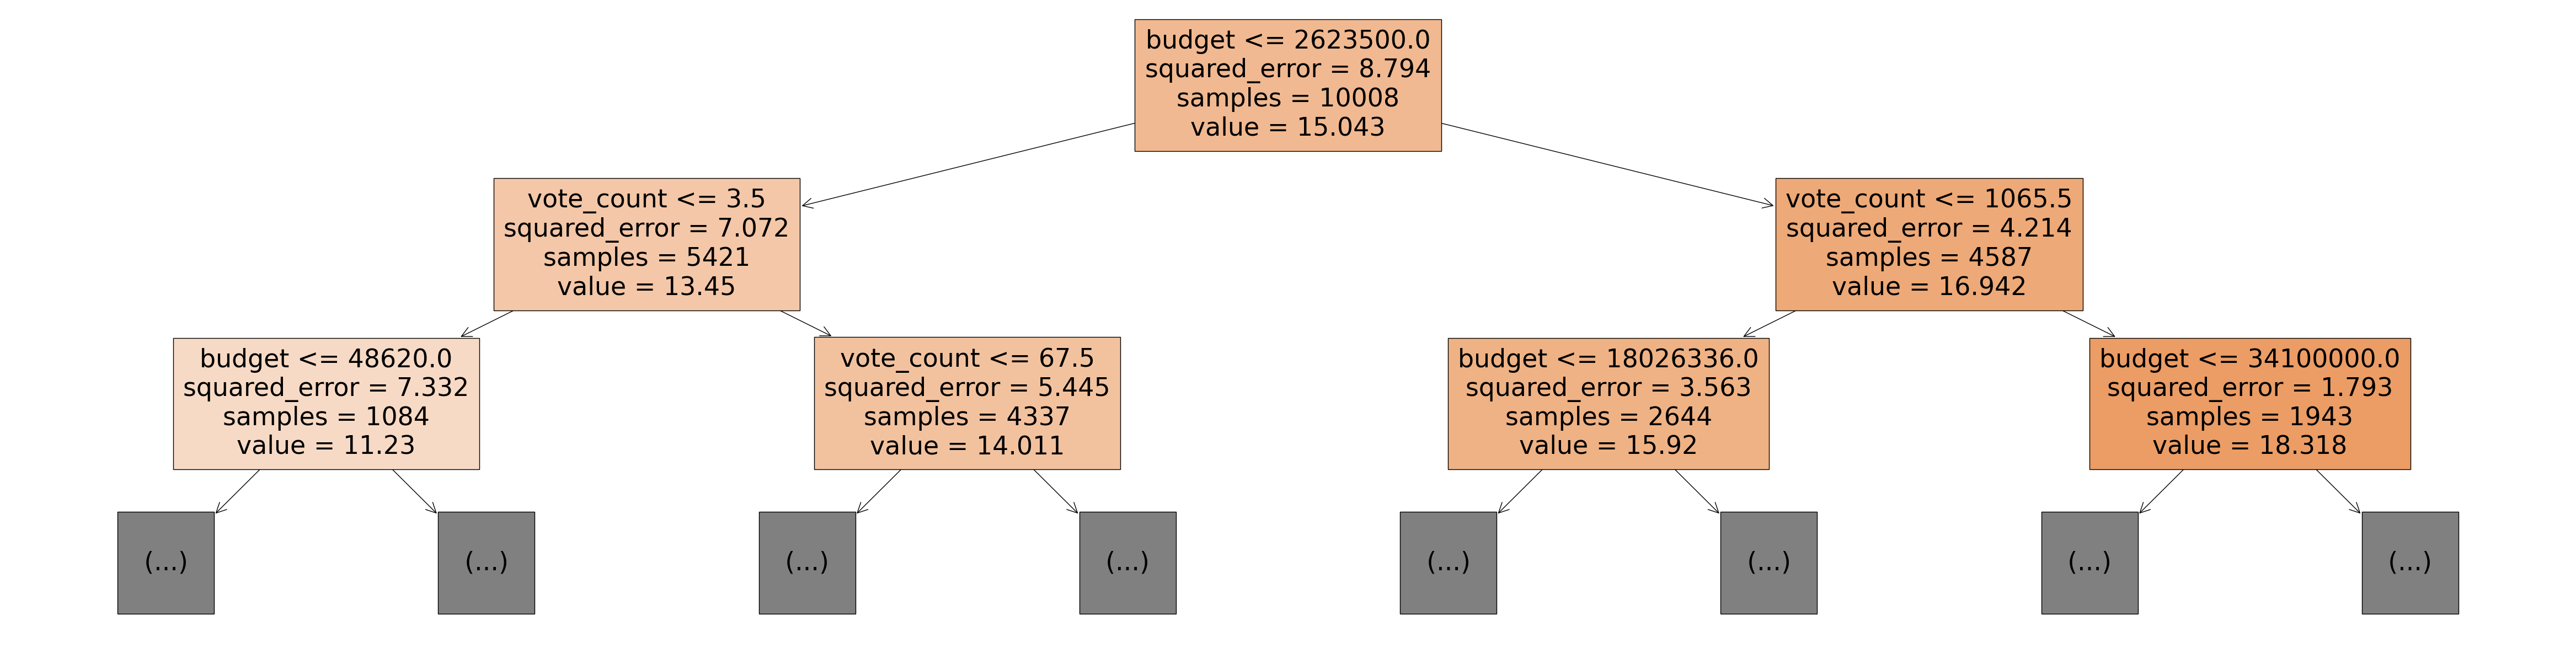

In [ ]:
#first tree in the random forest
plt.figure(figsize=(60,15));
plot_tree(bestestimator.estimators_[0], max_depth=2, feature_names= X.columns,filled=True);

# Conclusion
In conclusion, our model selection process aimed to identify the most effective predictive model for movie revenue.

After evaluating several models including Linear Regression, Decision Tree, and RandomForest, RandomForest emerged as the top performer. It consistently demonstrated superior performance in terms of predictive accuracy, as evidenced by lower RMSE scores.

Furthermore, feature importance analysis highlighted the 'budget' variable as a critical factor influencing revenue prediction.

By leveraging RandomForest, we can confidently predict movie revenue with greater accuracy, thereby aiding decision-making processes in the film industry.